# 문서 유사도 - 코사인 유사도

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.pi

3.141592653589793

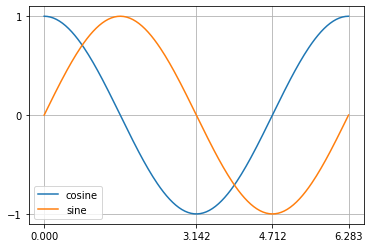

In [6]:
xs = np.linspace(0, 2*np.pi, 200) # 200 등분
cosx = np.cos(xs) # cos(0)=1 , cos(pi/2)=0 , 
sinx = np.sin(xs) # sin(0)=0 , sin(pi/2)=1

plt.plot(xs, cosx, label='cosine')
plt.plot(xs, sinx, label='sine')
plt.xticks([0, np.pi, 3*np.pi/2, 2*np.pi])
plt.yticks([-1, 0, 1])
plt.grid(), plt.legend()
plt.show()

In [8]:
v1, v2, v3 = np.array([1,1,0]), np.array([2,1,0]), np.array([0,0,1])
v1_norm = np.sqrt(np.sum(np.square(v1)))
v2_norm = np.sqrt(np.sum(np.square(v2)))
v3_norm = np.sqrt(np.sum(np.square(v3)))

v1_norm, v2_norm, v3_norm

(1.4142135623730951, 2.23606797749979, 1.0)

In [11]:
# v1과 v2의 유사도
cos12 = np.dot(v1, v2) / (v1_norm * v2_norm)
# v1과 v2의 유사도
cos13 = np.dot(v1, v3) / (v1_norm * v3_norm)
# v2과 v3의 유사도
cos23 = np.dot(v2, v3) / (v2_norm * v3_norm)

cos12, cos13

(0.9486832980505138, 0.0)

In [13]:
# 코사인 유사도 함수로 만들기
# numpy로 만들어야 가능~~!!
def cos_similarity(v1, v2):
  v1_norm = np.sqrt(np.sum(np.square(v1)))
  v2_norm = np.sqrt(np.sum(np.square(v2)))
  return np.dot(v1, v2) / (v1_norm * v2_norm)

- 문장의 코사인 유사도

In [14]:
doc_list = ['if you take the blue pill, the story ends' ,
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

In [19]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#cvect = CounterVectorizer(stop_words='english') -> stop_words='english' 넣으니까 남는게 없어,,,
cvect = CountVectorizer()
doc_cv = cvect.fit_transform(doc_list)
doc_cv.toarray()

array([[1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 2],
       [0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 0, 2]])

In [22]:
tvect = TfidfVectorizer()
doc_tv = cvect.fit_transform(doc_list)
doc_tv.toarray()

array([[1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 2],
       [0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 0, 2]])

In [27]:
d1, d2, d3 = doc_list[0], doc_list[1], doc_list[2]

In [28]:
d1, d2, d3 = doc_tv.toarray()
print(f'문장1 vs 문장2:{cos_similarity(d1,d2):.4f}')
print(f'문장1 vs 문장3:{cos_similarity(d1,d3):.4f}')
print(f'문장2 vs 문장3:{cos_similarity(d2,d3):.4f}')

문장1 vs 문장2:0.6093
문장1 vs 문장3:0.6396
문장2 vs 문장3:0.6804


- Scikitlearn 코사인 유사도

In [29]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([d1], [d2]) 

array([[0.6092718]])

In [30]:
cosine_similarity(doc_cv) # = cosine_similarity(doc_cv, doc_cv)

array([[1.        , 0.6092718 , 0.63960215],
       [0.6092718 , 1.        , 0.68041382],
       [0.63960215, 0.68041382, 1.        ]])

In [31]:
cosine_similarity(doc_tv, doc_tv) #  =cosine_similarity(doc_tv)

array([[1.        , 0.6092718 , 0.63960215],
       [0.6092718 , 1.        , 0.68041382],
       [0.63960215, 0.68041382, 1.        ]])